Example Command: \
python utils/main.py --model er --dataset seq-cifar10 --n_epochs 50 --lr 0.1  --batch_size 32 --minibatch_size 32 --buffer_size 5000 --nowand 1 --non_verbose 1 --ignore_other_metrics 1 --seed 42 --poisoning_type 1 --poisoning_severity 5 --n_poisonings 1 --classes_per_poisoning 0

# Visualization Functions

In [1]:
import matplotlib.pyplot as plt
import json
import numpy as np
import seaborn as sns

In [2]:
def read_results(path, metric="task_accuracies"):
    with open(path, "r") as jsonfile:
        data = json.load(jsonfile)

    accuracy_array = data[metric]
    max_len = 0
    for task_accuracy in accuracy_array:
        if len(task_accuracy) > max_len:
            max_len = len(task_accuracy)

    for task_accuracy in accuracy_array:
        for _ in range(max_len - len(task_accuracy)):
            task_accuracy.append(np.nan)

    # accuracy_array = np.array(accuracy_array)
    return accuracy_array

In [3]:
def generate_heatmap(accuracies, title, cmap_index=0):
    cmaps = ["crest", "rocket", "magma", "viridis", "icefire", "mako"]
    plt.figure(figsize=(8, 6))

    for i, task_accuracies in enumerate(accuracies):
        avg_task_accuracy = np.nanmean(task_accuracies)
        accuracies[i].append(avg_task_accuracy)

    ax = sns.heatmap(
        accuracies,
        annot=True,
        cmap=cmaps[cmap_index],
        cbar=True,
        linewidths=0.5,
        fmt=".2f",
        square=True,
        xticklabels=[f"Task {i+1}" for i in range(len(accuracies))] + ["Avg"],
    )

    for i in range(len(accuracies)):
        ax.add_patch(
            plt.Rectangle(
                (len(accuracies), i),
                1,
                1,
                fill=True,
                edgecolor="black",
                lw=1.5,
                color="#000",
            )
        )

    ax.set_yticklabels([f"Task {i+1}" for i in range(len(accuracies))], rotation=0)
    plt.title(title)

    plt.show();

# ER

### Baseline With RandomCrop and RandomHorizontalFlip Transforms

/tmp/ipykernel_2852428/2211510094.py:22: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.Rectangle(


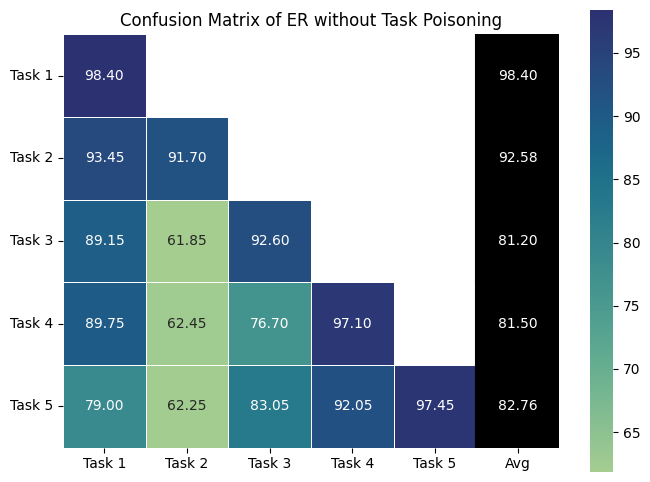

In [11]:
accuracies = read_results(
    "./10-09-24-17-54-43-seq-cifar10-poisoning--1-task-accuracies.json"
)  # 82.56, 82.76, 84.38

generate_heatmap(accuracies, title="Confusion Matrix of ER without Task Poisoning")

### Gaussian Poisoning

n_poisoning = 1, poisoning_type = 1, poisoning_severity = 5, classes_per_poisoning = 2

/tmp/ipykernel_2852428/2211510094.py:22: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.Rectangle(


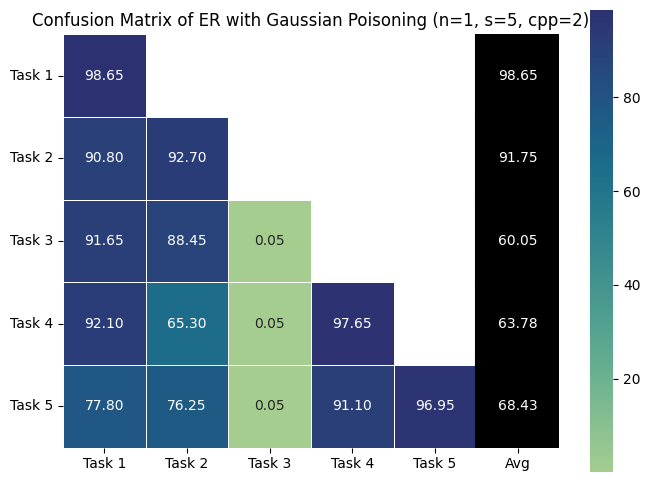

In [14]:
accuracies = read_results(
    "./10-19-24-12-53-24-seq-cifar10-poisoning-1-task-accuracies.json"
)  # 67.64, 68.43, 68.93

generate_heatmap(accuracies, title="Confusion Matrix of ER with Gaussian Poisoning (n=1, s=5, cpp=2)")

n_poisoning = 1, poisoning_type = 1, poisoning_severity = 5, classes_per_poisoning = 1

/tmp/ipykernel_2852428/2211510094.py:22: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.Rectangle(


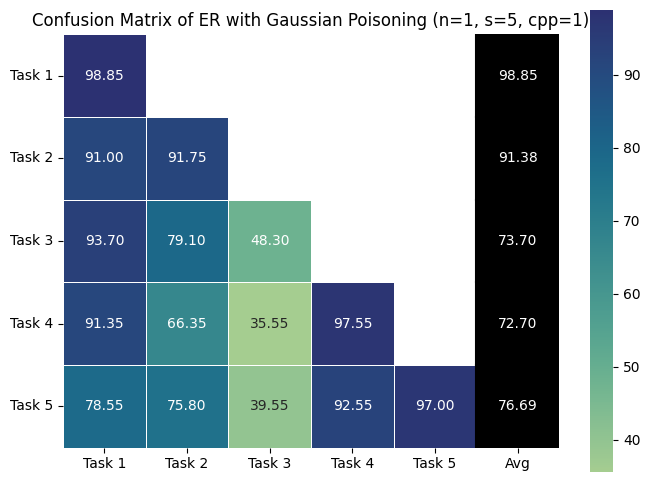

In [17]:
accuracies = read_results(
    "./10-21-24-15-28-58-seq-cifar10-poisoning-1-task-accuracies.json"
)  # 74.96, 76.69, 76.75

generate_heatmap(accuracies, title="Confusion Matrix of ER with Gaussian Poisoning (n=1, s=5, cpp=1)")